[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/18EbJFtYbRlYhUg7iKEm2RTqVIh8xChXl?usp=sharing)

<br>

< [5. Modele](PD_modele.ipynb) | [7. Rozwiązanie Bazowe.](PD_rozw_bazowe.ipynb) >


## [6. Rozwiązania optymalizujące proces trenowania.]()

Zmiany poprawiające proces uczenia zaimpementowane w [[1] reid-strong-baseline -github](https://github.com/michuanhaohao/reid-strong-baseline) zostały zaprezentowane na grafice umieszczonej poniżej.
<div align="center">
<br><br>
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/reidTricks.jpg?raw=true" alt="drawing" width="400"/>
<br> Rys.6 Ilustracja przestawiająca proces przetwarzania danych w użytym framework-u <a href="https://arxiv.org/pdf/1903.07071.pdf">[6]</a>

<br><br>
</div>


### 6.1 Rozgrzewanie kroku uczenia (Warmup Learning Rate)

Learning Rate ma bezpośredni wpływ na to jak szybko model zmienia swoje wagi. W celu wygenerowanai statystyk ułatwiających manipulowaniem parameterem Learning Rate przez optymalizator, statuje się mechanizm nazywany "Rozgrzewaniem kroku uczenia". Polega on na poświęceniu kilku pierwszych epok na stworzeniu statystyk przy ustawionym domyślnie kroku uczenia na niskim poziomie. W praktyce zaimplementowano to w spoósb:

<div align="center">
 <img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/learning-rate.png?raw=true" alt="drawing" width="400"/>
<br>
 Rys.7 Ilustracja z wartościami larning rate w zależności od ilości przetrenowanych epok <a href="https://arxiv.org/pdf/1903.07071.pdf">[6]</a>
</div>

### 6.2 Losowo wycinanie (Random Erasing Augumentation)

Losowe wycinanie fragmentów obrazów jest powszechnie stosowanym sposobem augumetacji danych. Ma on na celu uniezależnienie modelu na zmiany, które nie powinny być ważnymi cechami obiektu na ktorego podstawie generowany jest jego embeding.


Przykład realizowany na opisanym powyżej datasecie Martek1501:
<div align="center">
 <img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/random_erasing.png?raw=true" alt="drawing" width="400"/>
<br>
Rys.8 Przykłady augumentacji danych. Wycinanie losowego fragmentu obrazu <a href="https://arxiv.org/pdf/1903.07071.pdf">[6]</a>
</div>

### 6.3 Wygładzanie adnotacji (Label Smoothing)

Ponieważ adnotacja danych bierze udział w przeliczaniu funkcji strat jako jeden z jej składników, problemem staje się przetrenowanie modelu w kontekście wykrywania właśnie adnotacji. Metodą na prewencję takiej sytuacji jest użycie "Wygładzania adnotacji". Polega to rozłożeniu niewielkiej części prawdopodobieństwa na inne klasy. W przypadku rozpatrywanym w tej pracy na bazie zbioru danych Markets1501 inną klasą jest id innej osoby. 

<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/label_smoothing.png?raw=true" alt="drawing" width="400"/>

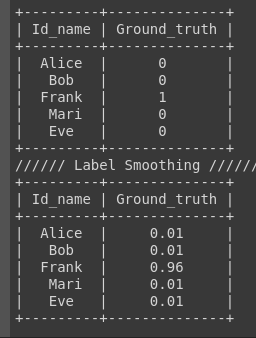

### 6.4 Zmiana ostatniego warstwy konwolucyjnej (Last Stride)

Jedną z potrzeb jakie adresują wartwy konwolucyjne to agregacja wymiarów cech rozwiniętych przez poprzednie warstwy. Modyfikacja dotycząca tego punktu polega na ograniczeniu agregacji cech ostatniej warstwy i pozostawienia wiekszej reprezentacji cech głębokich sieci stanowiącej backbone trenowanego modelu. 

### 6.5 BBNeck

Dużą część pracy jaką poświęcili twórcy framework-u użytego w tej pracy, stanowiła zmiana opisana jako BBNeck.

<div align="center">
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/bnn-modify.png?raw=true" alt="drawing" width="400"/>
<br>
Rys.9 Porównanie ostatnich warstw sieci w standardowym rozwiązaniu oraz BNNeck <a href="https://arxiv.org/pdf/1903.07071.pdf">[6]</a>
<br><br>
</div>

Jak zaprezentowano na załączonej ilustracji zaczerpniętej z pracy [[6]](https://arxiv.org/pdf/1903.07071.pdf) w przypadku a) będącym typowym podejściem ID loss i triplet loss działają na tym samej warstwie cech głębokich (embedding-ów). W takiej sytuacji lepiej sprawdza się przeliczenie dystansu cosinusowego czyli porównanie kierunków wyznaczonych przez wektory w przestrzeni embeddingów. Natomiast w przypadku b) wykorzystanie odległości euklidesowej w przestrzeni wektorów embeddingów sprzyja zagęszczaniu wyników wewnątrz klasową oraz zwiększanie odległości między zbiorami należacymi do innych klas. Ponieważ zagęszczanie wyników wewnątrz jednej klasy może zdecydowanie szybciej minimalizować funkcję strat triple loss, niż zwiększania odległości między klasowej wprowadzono kolejną warstwę cech głębokich. Kolejna warstwa jest znormalizowaną warstwą cech głębokich (embeddingów). Idea stojąca za takim krokiem polega na wymuszeniu stałej długości wektorów cech dla różnych klas. Zwiększa to znaczenie zwiększania odległości między różnymi klasami, co prowadzi do ograniczenia problemu minimalizacji międzyklasowej "kosztem" maksymalizacji odległości międzyklasowej. Idę bardzo dobrze ilustruje grafika zawarta w pracy [[6]](https://arxiv.org/pdf/1903.07071.pdf)

<div align="center">
<br>
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/bnn-modify-2.png?raw=true" alt="drawing" width="800"/>
<br>
Rys.10 Ilustracja wpływu poszczególnych rozwiązań na rozmieszczenie obrazów w przestrzeni embedingów <a href="https://arxiv.org/pdf/1903.07071.pdf">[6]</a>
<br><br>
</div>

### 6.6 Center Loss

To rozwiązanie dodające do fukcji strat bezpośredni człon odpowidzialny za penalizowanie dużych rozbieżności w obrębie jednej klasy. Formuła na przeliczenie takiego członu zaprezentowano poniżej:

<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/center-loss.png?raw=true" alt="drawing" width="400"/>

W rezultacie funkcja strat posiada trzy człony zaprazentowane poniżej:

<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/loss-fun.png?raw=true" alt="drawing" width="400"/>

### 6.7 Podsumowanie

W pracy [[6]](https://arxiv.org/pdf/1903.07071.pdf) zaprezentowano wyniki jakie dają użycie poszczególnych usprawnienień opisanych powyżej. To zestawienie wygląda jak poniżej:

<div align="center">
<img src="https://github.com/tomektarabasz/Praca_Dyplomowa_Tomasz_Tarabasz/blob/master/img/trick-summarization.png?raw=true" alt="drawing" width="400"/>
<br>
Rys.11 Tabela przedstawiająca poprawę wyników dla poszczególnych technik optymalizacji treningu użytych w <a href="https://arxiv.org/pdf/1903.07071.pdf">[6]</a>
<br><br>
</div>

Jest to unikatowa wartość jaką wprowadza praca [[6]](https://arxiv.org/pdf/1903.07071.pdf). Daję ona wiarygone informację jaką jakościową zmianę można spodziewać się z użycia każdego z usprawnień i zaplanowanie wiarygodnego porównania zmian wprowadzanych do modeli. 

## Nawigacja



<br>

< [5. Modele](PD_modele.ipynb) | [7. Rozwiązanie Bazowe.](PD_rozw_bazowe.ipynb) >
